In [35]:
import torch
import torchvision
import torchvision.transforms as transforms

from train import *
from models import *
import datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import os

plt.xkcd()
plt.rcParams["figure.figsize"] = (10,5)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [56]:
class BaselineCNN(nn.Module):
    def __init__(self, n_classes):
        super(BaselineCNN, self).__init__()
        self.encoder_cnn = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=5, padding=2, stride=1),
            nn.AvgPool2d(kernel_size=3, padding=1, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(8, 8, kernel_size=5, padding=2, stride=1),
            nn.AvgPool2d(kernel_size=3, padding=1, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(8, 8, kernel_size=5, padding=2, stride=1),
            nn.ReLU(inplace=True),
        )
        self.fc1 = nn.Linear(8*24*24, 1024)
        self.relu = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(1024, n_classes)
        
    def forward(self, image_tensor):
        x = self.encoder_cnn(image_tensor)
        x = x.view(-1, 8*24*24)
        x = self.fc2(self.relu(self.fc1(x)))
        pred = F.log_softmax(x, dim=1)
        return pred

In [57]:
# Load the data
train_set = datasets.MiniplacesDataset('train')
val_set = datasets.MiniplacesDataset('val')
classes = []
txt_root = './miniplaces/development_kit/data'
txt_dir = os.path.join(txt_root, "categories" + '.txt')
with open(txt_dir, 'r') as f:
    for line in f:
        tokens = line.strip().split()
        classes.append(tokens[0])

In [58]:
model = BaselineCNN(len(classes))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [59]:
train_losses, train_accs, val_losses, val_accs = train(model, criterion, optimizer, 
                                                       train_set, val_set, num_epochs=10,
                                                       batch_size=16, device=device, attn=False)

[1,  1250] loss: 4.366
[1,  2500] loss: 4.157
[1,  3750] loss: 4.030
[1,  5000] loss: 3.966
[1,  6250] loss: 3.912
Accuracy: 0.101200 
Loss: 3.897212 
[2,  1250] loss: 3.857
[2,  2500] loss: 3.850
[2,  3750] loss: 3.825
[2,  5000] loss: 3.801
[2,  6250] loss: 3.790
Accuracy: 0.124100 
Loss: 3.742096 
[3,  1250] loss: 3.732
[3,  2500] loss: 3.770
[3,  3750] loss: 3.738
[3,  5000] loss: 3.729
[3,  6250] loss: 3.735
Accuracy: 0.133600 
Loss: 3.702569 
[4,  1250] loss: 3.692
[4,  2500] loss: 3.696
[4,  3750] loss: 3.696
[4,  5000] loss: 3.688
[4,  6250] loss: 3.693
Accuracy: 0.136800 
Loss: 3.692309 
[5,  1250] loss: 3.672
[5,  2500] loss: 3.645
[5,  3750] loss: 3.646
[5,  5000] loss: 3.670
[5,  6250] loss: 3.644
Accuracy: 0.152500 
Loss: 3.607394 
[6,  1250] loss: 3.625
[6,  2500] loss: 3.646
[6,  3750] loss: 3.623
[6,  5000] loss: 3.621
[6,  6250] loss: 3.632
Accuracy: 0.149500 
Loss: 3.619438 
[7,  1250] loss: 3.608
[7,  2500] loss: 3.617
[7,  3750] loss: 3.615
[7,  5000] loss: 3.625
[7

In [60]:
np.save("data/TRAIN_BaselineCNN_Adam_lr=0.001_batch=16_epochs=10.npy", 
        np.vstack([train_losses, train_accs]))
np.save("data/VAL_BaselineCNN_Adam_lr=0.001_batch=16_epochs=10.npy", 
        np.vstack([val_losses, val_accs]))
torch.save(model.state_dict(), "data/BaselineCNN_Adam_lr=0.001_batch=16_epochs=10.pth")

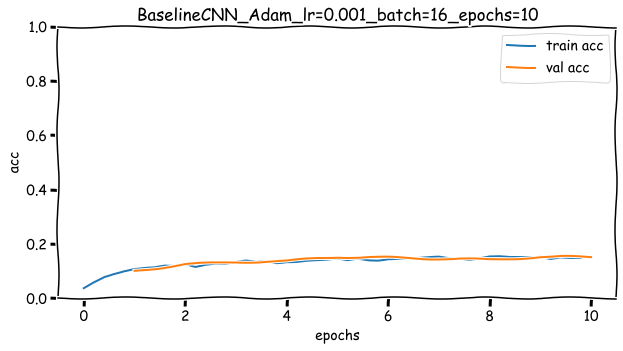

In [61]:
fig = plt.figure()
plt.plot([i * len(val_accs) / len(train_accs) for i in range(len(train_accs))], train_accs, label='train acc')
plt.plot([i+1 for i in range(len(val_accs))], val_accs, label='val acc')
plt.ylim(0, 1)
plt.title("BaselineCNN_Adam_lr=0.001_batch=16_epochs=10")
plt.ylabel("acc")
plt.xlabel("epochs")
plt.legend()

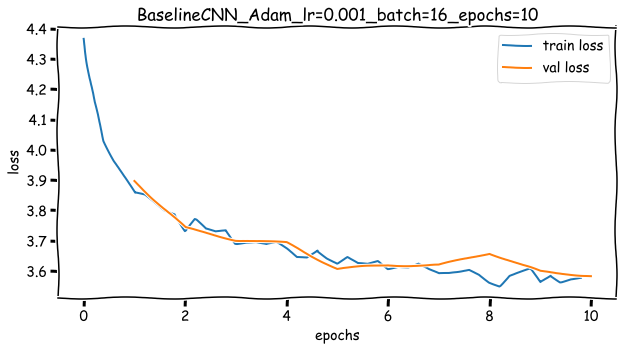

In [62]:
fig = plt.figure()
plt.plot([i * len(val_losses) / len(train_losses) for i in range(len(train_losses))], train_losses, label='train loss')
plt.plot([i+1 for i in range(len(val_losses))], val_losses, label='val loss')
plt.title("BaselineCNN_Adam_lr=0.001_batch=16_epochs=10")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()